# Frozen Lake Q-Learning Agent
- Observation Space is of 1D, denoting the space the agent is in
- Thus, the total q-table is 2D including the action space

In [12]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

## Q-Learning Agent Implementation Trial 1

In [13]:
ALPHA = 0.5
GAMMA = 0.95 
EPSILON = .1
# EPSILON_DECAY = .9999

EPISODE_LEN = 200
ENV_NAME = "FrozenLake-v1"


In [14]:
"""Exploring environment"""

"""
env = gym.make(ENV_NAME)

episodes = 1
for i_ep in range(episodes):
    obs = env.reset()
    done = False
    count = 0
    
    while not done:
        action = env.action_space.sample()
        obs, rew, done, _ = env.step(3)
        count += 1
        print(obs)
        
        env.render()
        

print(count)
"""

'\nenv = gym.make(ENV_NAME)\n\nepisodes = 1\nfor i_ep in range(episodes):\n    obs = env.reset()\n    done = False\n    count = 0\n    \n    while not done:\n        action = env.action_space.sample()\n        obs, rew, done, _ = env.step(3)\n        count += 1\n        print(obs)\n        \n        env.render()\n        \n\nprint(count)\n'

In [15]:
def greedy(epsilon):
    
    return np.random.rand() > epsilon


def q_func(reward, q_current_value, q_forward_value):
    """Returns q_value to update q_table with"""

    q_value = q_current_value + ALPHA * (reward + GAMMA * q_forward_value - q_current_value)
    return q_value


def train(agent, episodes, render=False):
    scores = []

    for i in range(episodes):
        score = agent.evaluate(render)
        print("Episode:", i + 1, "\tScore:", score)

        scores.append(score)

    return scores


def display(values):
    plt.plot(values)

    plt.title("Training Data")
    plt.xlabel("Episodes")
    plt.ylabel("Score")

    plt.show()


In [16]:
class QAgent:
    def __init__(self):
        self.q_table = np.zeros((16, 4))
        self.epsilon = EPSILON

        self.env = None
        self.make()

    def _forward(self, state, overrideGreedy=False):
        env = self.env
        q_table = self.q_table
        epsilon = self.epsilon

        # self.epsilon *= EPSILON_DECAY

        if not greedy(epsilon) and not overrideGreedy:
            return env.action_space.sample()

        return np.argmax(q_table[state])

    def evaluate(self, render=False, delay=0):
        """Evaluate Q-Learning Agent

        :param int cur_obs: Current observation state
        :param int for_obs: Forward observation state
        :param int cur_action: Current action state
        :param int for_action: Forward action state
        :param int rew: Forward observation reward
        :param float q_cur_val: Q-value of current state, current action -> Q(s, a)
        :param float q_for_val: Q-value of forward state, forward action -> Q(s', a')
        """

        env = self.env
        q_table = self.q_table

        cur_obs = env.reset()
        cur_action = self._forward(cur_obs)

        done = False
        explored = [False] * 16
        explored[
            0
        ] = True  # Make starting square already complete so agent doesn't try to move backwards
        score = 0
        step = 0

        while not done:
            if step == EPISODE_LEN:
                break

            for_action = self._forward(cur_obs)

            for_obs, rew, done, _ = env.step(for_action)

            """
            if rew == 1:
                rew = 100
            elif done:
                rew = -50
            elif not explored[for_obs]:
                rew = 10
                explored[for_obs] = True
            else:
                rew = -5
            """

            q_cur_val = q_table[cur_obs][cur_action]
            # q_for_val = q_table[for_obs][self._forward(for_obs, overrideGreedy=True)] #! DOES NOT WORK BC _forward() RETURNS INDEX BRUH
            q_for_val = np.max(q_table[for_obs])
            q_value = q_func(rew, q_cur_val, q_for_val)
            q_table[cur_obs][cur_action] = q_value

            cur_obs = for_obs
            cur_action = for_action
            score += rew
            step += 1

            if render:
                env.render()
                sleep(delay)
        
        self.q_table = q_table

        return score

    def make(self):
        if self.env is None:
            env = gym.make(ENV_NAME, is_slippery=False)
            env._max_episode_steps = EPISODE_LEN
            self.env = env

    def close(self):
        if self.env is not None:
            self.env.close()
            self.env = None


In [17]:
"""
a = QAgent()
"""

'\na = QAgent()\n'

In [18]:
"""
scores = train(a, 1000)
display(scores)
"""

'\nscores = train(a, 1000)\ndisplay(scores)\n'

In [19]:
"""
for i, row in enumerate(a.q_table):
    print(i, np.argmax(row))
"""

'\nfor i, row in enumerate(a.q_table):\n    print(i, np.argmax(row))\n'

In [20]:
"""
a.evaluate(render=True, delay=0.5)
"""

'\na.evaluate(render=True, delay=0.5)\n'

## [Reference Solution](https://towardsdatascience.com/q-learning-for-beginners-2837b777741)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59044863]
 [0.59007624 0.729      0.56045967 0.65553578]
 [0.63842692 0.         0.45179954 0.46255656]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.65576079]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80993922 0.9        0.72840003]
 [0.81       0.9        1.         0.81      ]
 [0.

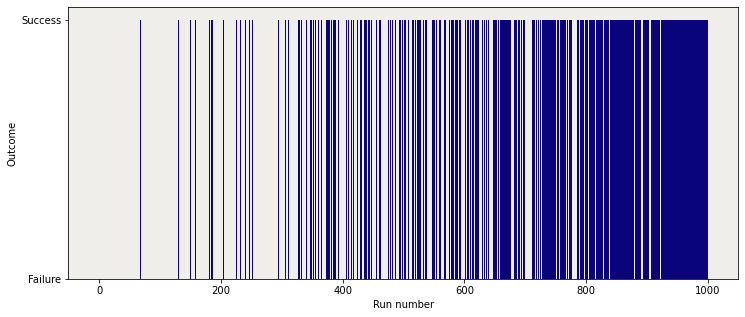

In [21]:
environment = gym.make(ENV_NAME, is_slippery=False)

qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000  # Total number of episodes
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print("Q-table before training:")
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
            action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + alpha * (
            reward + gamma * np.max(qtable[new_state]) - qtable[state, action]
        )

        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print("===========================================")
print("Q-table after training:")
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor("#efeeea")
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()


## Q-Agent Trial 2

### Class with Q-Learning and SARSA

In [50]:
EPISODES = 1000
ALPHA = 0.5
GAMMA = 0.9
EPSILON = 1.0
EPSILON_DECAY = 0.999
EPSILON_MIN = 0.0001


class QAgent:
    def __init__(self, type="QLEARNING", env_name=ENV_NAME):
        env = gym.make(env_name)
        self.env = env
        
        self.type = type

        self.rewards = []
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
        self.epsilon = EPSILON

    def evaluate(self, episodes=EPISODES):
        rewards = self.rewards
        q_table = self.q_table
        epsilon = self.epsilon
        
        env = self.env
        type = self.type

        for _ in range(episodes):
            state = env.reset()
            done = False

            while not done:
                if not greedy(epsilon):
                    action = env.action_space.sample()
                else:
                    action = np.argmax(q_table[state])

                forward_state, reward, done, _ = env.step(action)

                q_current = q_table[state, action]
                if type == "QLEARNING":
                    q_forward = np.max(q_table[forward_state])
                else:
                    q_forward = np.average(q_table[forward_state])

                q_table[state, action] = q_func(reward, q_current, q_forward)

                state = forward_state

            rewards.append(reward)
            epsilon *= EPSILON_DECAY
            epsilon = max(EPSILON_MIN, epsilon)

        self.rewards = rewards
        self.epsilon = epsilon
        self.q_table = q_table
        
        return rewards


In [42]:
q_agent = QAgent()
sarsa_agent = QAgent(type="SARSA")

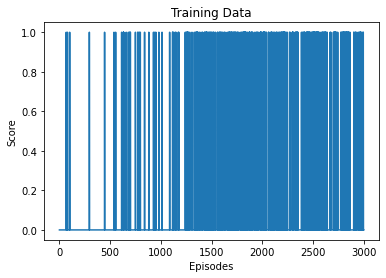

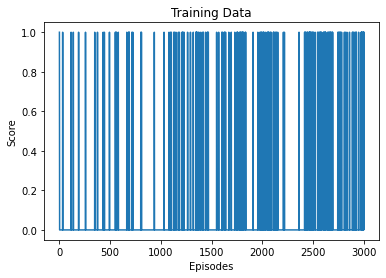

In [43]:
q_rewards = q_agent.evaluate(3000)
display(q_rewards)
sarsa_rewards = sarsa_agent.evaluate(3000)
display(sarsa_rewards)

## Using the QL Model to Solve Taxi-v3

In [48]:
q_agent = QAgent(env_name="Taxi-v3")
sarsa_agent = QAgent(type="SARSA", env_name="Taxi-v3")

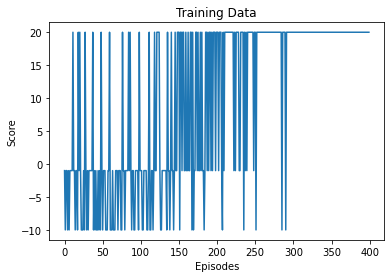

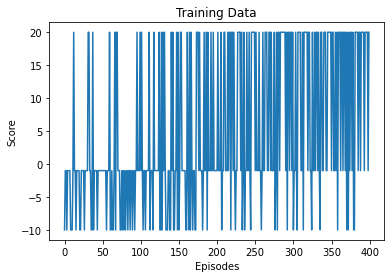

In [49]:
q_rewards = q_agent.evaluate(400)
display(q_rewards)
sarsa_rewards = sarsa_agent.evaluate(400)
display(sarsa_rewards)